# Setup

In [1]:

import pandas as pd
import seaborn as sns

from helper_functions import *
from keys import *

selectedFile = "data/survey/finalsurvey.csv"
df = pd.read_csv(selectedFile,
                 encoding="utf-16",
                 skiprows=range(1, 2), # file has two header rows, need to skip both
                 header=0,
                 )

# if you want to switch from errors to correct answers
# df["AR_Listen_Perf"] = 12 - df["AR_Listen_Perf"] 
# df["NonAR_Listen_Perf"] = 12 - df["NonAR_Listen_Perf"] 


# Survey

## Demographics

In [2]:
for k, n in zip(Demographic.Keys, Demographic.Names):
    df[n] = df[k]

df[[
    "Alter",
    "ArErfahrung",
    "Arbeitsumgebung",
    "Bildschirmzeit im Beruf/Studium",
    "Bildschirmzeit in der Freizeit",
    "Cybersickness",
    "NaturZurEntspannung",
    "NutzungRelaxApps",
    "Geschlecht"
]].describe().applymap('{:.2f}'.format)



,Alter,ArErfahrung,Arbeitsumgebung,Bildschirmzeit im Beruf/Studium,Bildschirmzeit in der Freizeit,Cybersickness,NaturZurEntspannung,NutzungRelaxApps,Geschlecht
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,23.33,2.08,1.50,6.92,4.58,0.83,2.67,1.08,1.25
std,3.70,0.90,0.90,2.07,1.16,0.94,0.49,0.29,0.45
min,16.00,1.00,1.00,3.00,3.00,-1.00,2.00,1.00,1.00
25%,23.00,1.00,1.00,5.75,4.00,1.00,2.00,1.00,1.00
50%,24.50,2.00,1.00,7.00,4.50,1.00,3.00,1.00,1.00
75%,25.25,3.00,1.50,9.00,5.00,1.00,3.00,1.00,1.25
max,27.00,3.00,3.00,9.00,7.00,2.00,3.00,2.00,2.00


## Short Stress State

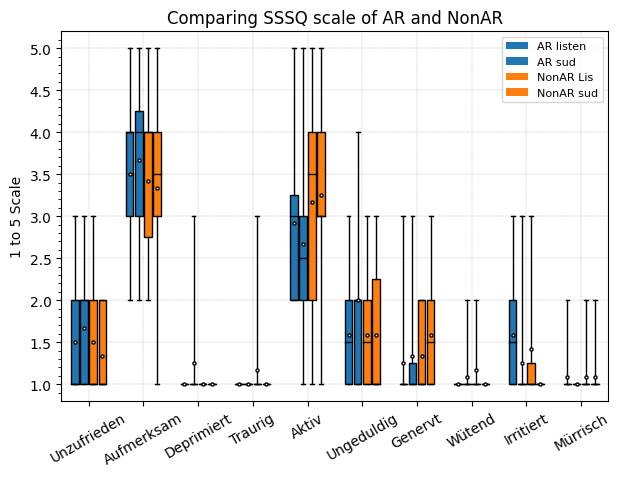

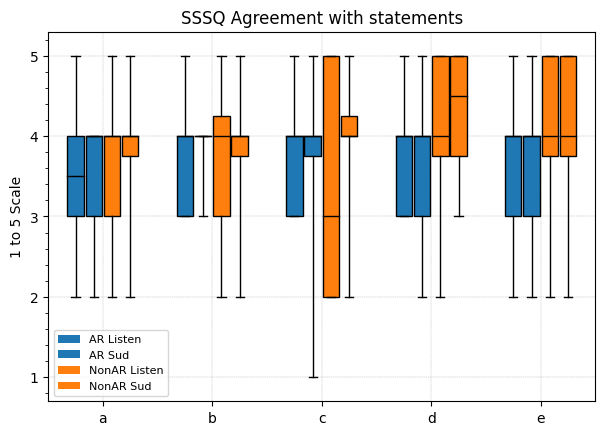

a) Ich war entschlossen meine Leistungsziele zu erreichen
b) Ich wollte bei der Aufgabe erfolgreich sein
c) Ich war motiviert die Aufgabe umzusetzen
d) Ich führte die Aufgabe kompetent aus
e) Grundsätzlich fühlte ich, dass ich die Dinge unter Kontrolle hatte


In [4]:
# groupedBoxPlots([df[SSSQ.Scale.AR.Listen_Keys], df[SSSQ.Scale.NonAR.Listen_Keys]], 
#                 ["AR Listen ", "NonAR Listen"])

groupedBoxPlots(
    [df[SSSQ.Scale.AR.Listen_Keys], 
     df[SSSQ.Scale.NonAR.Listen_Keys],
     df[SSSQ.Scale.AR.Sudoku_Keys], 
     df[SSSQ.Scale.NonAR.Sudoku_Keys]],
     ["AR listen", "AR sud", "NonAR Lis", "NonAR sud"],
     labels=SSSQ.Scale.Names,
     title="Comparing SSSQ scale of AR and NonAR",
     width=0.55,
     colours= COL_2Groups(2),
     meanMarkerSize=2.2,
     save=True,
     xlabel="",
     rot=30,
)


labels = [*"abcde"]
groupedBoxPlots(
    [df[SSSQ.StatementAgreement.AR.Listen_Keys], 
     df[SSSQ.StatementAgreement.NonAR.Listen_Keys],
     df[SSSQ.StatementAgreement.AR.Sudoku_Keys], 
     df[SSSQ.StatementAgreement.NonAR.Sudoku_Keys]],
    groups=["AR Listen", "AR Sud", "NonAR Listen", "NonAR Sud"],
    title="SSSQ Agreement with statements",
    labels=labels, rot=0,
    min=0.7, max=5.3,
    colours= COL_2Groups(2),
    # meanMarkerSize=3,
    xlabel="",
    save=True,
)
for label, frage, in zip(labels, SSSQ.StatementAgreement.Names):
    print(f"{label}) {frage}")

# makeBoxPlot(df[SSSQ.Scale.AR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach AR listen")
# makeBoxPlot(df[SSSQ.Scale.NonAR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach Non-AR listen")
# makeBoxPlot(df["DD01_01"], ["Alter"], "Demographie Übersicht")


## Short User Experience Questionaire

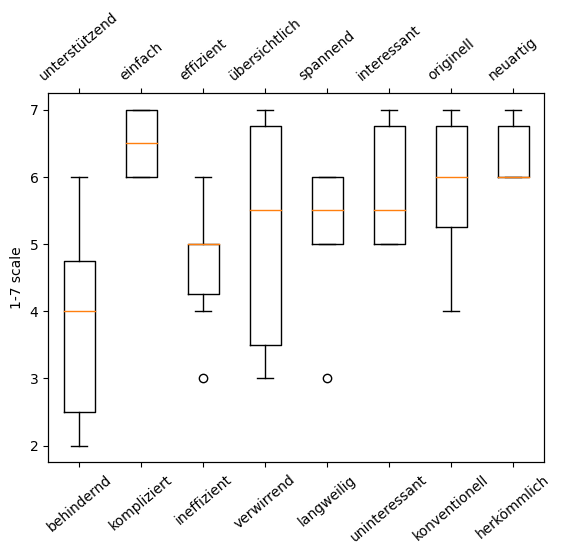

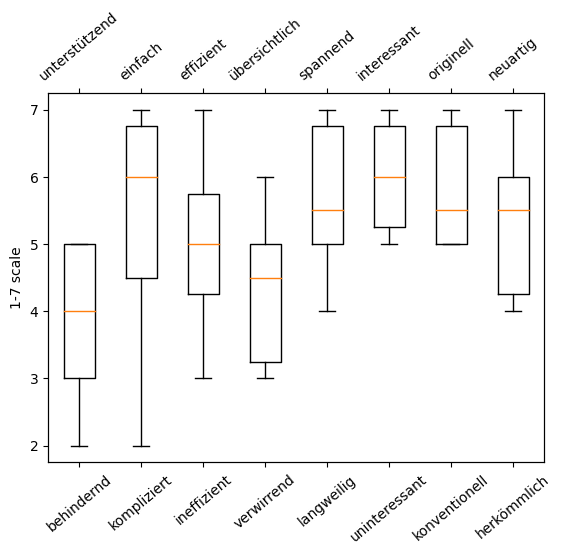

In [4]:
save=True
# save=False
dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys], "AR first runs", save)
dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys], "Non-AR first runs", save)


In [5]:


# groupedBoxPlots(
#     datasets=[
#         df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys],
#         df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys]
#     ],
#     groups= ["AR first", "NonAR first"],
#     labels=ShortUserExpQ.Names_left,
#     doubleX=True,
#     )

## Emotionsskala

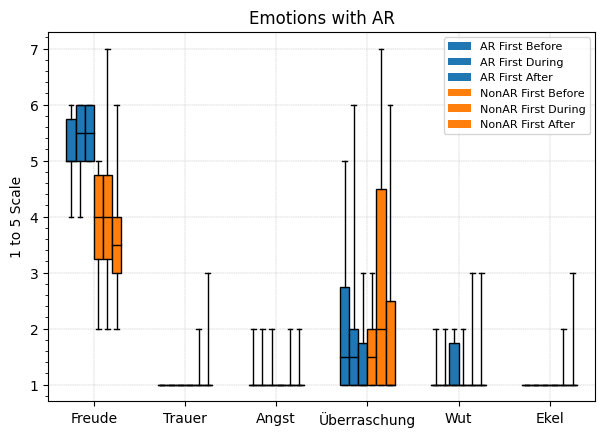

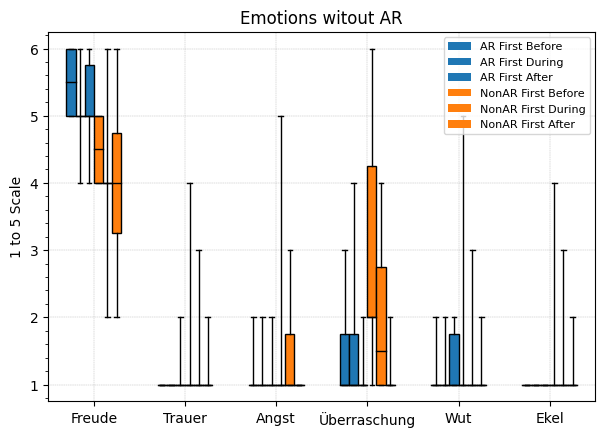

In [6]:
emoGroups = [
        "AR First Before",
        "AR First During",
        "AR First After",
        "NonAR First Before",
        "NonAR First During",
        "NonAR First After",
]
emoLabels = EmotionScales.Names

groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.AR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.AR.Nachher],
    ],
    emoGroups,
    labels=emoLabels,
    title="Emotions with AR",
    # colours=[*['tab:orange']*3, *['tab:blue']*3]
    colours=COL_2Groups(3),
    rot=0,
    xlabel="",
    save=True,
)
groupedBoxPlots(
    [
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "ArFirst")][EmotionScales.NonAR.Nachher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Vorher],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Zwischen],
        df.loc[(df["QUESTNNR"] == "NonArFirst")][EmotionScales.NonAR.Nachher],
    ],
    groups=emoGroups,
    labels=emoLabels,
    title="Emotions witout AR",
    # colours=COL_3v3,
    # colours=[*['tab:blue']*3, *['tab:orange']*3]
    colours=COL_2Groups(3),
    rot=0,
    xlabel="",
    save=True,
)

## Abschließende Fragen

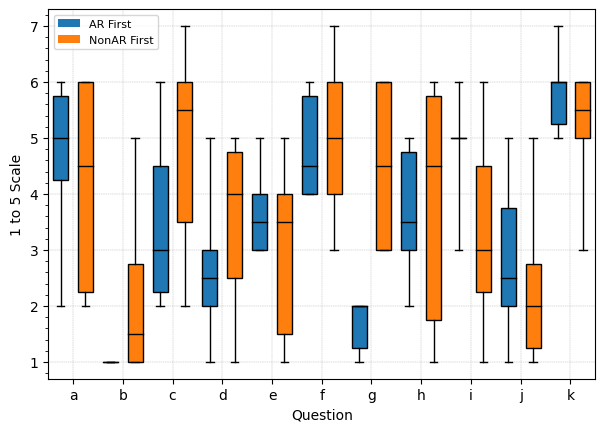

a) Ich war grundsätzlich aufgeregt, eine Augmented Reality Projektion zu erleben.
b) Ich empfand Übelkeit durch die virtuelle Projektionstechnik (Cyber Sickness)
c) Der eingeschränkte Sichtbereich der Projektion störte die Immersion
d) Das Tragen des Geräts war unangenehm
e) Ich hatte das Gefühl mich in der virtuellen Umgebung zu befinden
f) Ich habe die virtuelle Umgebung auch während dem Erledigen der Aufgaben beachtet
g) Die virtuelle Umgebung hat meine Konzentration gestört
h) Durch die virtuelle Umgebung habe ich mich naturnäher gefühlt
i) Durch die virtuelle Umgebung fühlte ich mich entspannter
j) Ich könnte mir vorstellen diese Anwendung zum Arbeiten zu nutzen
k) Ich könnte mir vorstellen eine solche Anwendung in Zukunft zu nutzen, wenn bestimmte Aspekte verbessert werden


In [2]:
labels = [*"abcdefghijk"]
groupedBoxPlots(
    [df.loc[(df["QUESTNNR"]=="ArFirst")][AbschließendeFragen.Keys],
     df.loc[(df["QUESTNNR"]=="NonArFirst")][AbschließendeFragen.Keys]],
    ["AR First", "NonAR First"],
    title="Abschließende Fragen",
    # labels=AbschließendeFragen.Names,
    labels=labels,
    rot=0,
    # save=True
)
for label, frage, in zip(labels, AbschließendeFragen.Names):
    print(f"{label}) {frage}")

# Task Performance

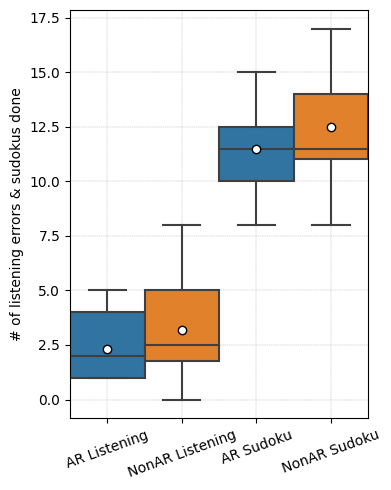

In [8]:
f = plt.figure(figsize=[4,5])
ax = f.add_subplot(111)

sns.set_palette(sns.color_palette(['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']))
chart = sns.boxplot(
    data=df[[
        "AR_Listen_Perf",
        "NonAR_Listen_Perf",
        "AR_Sudoku_Perf",
        "NonAR_Sudoku_Perf",
    ]],
    showmeans=True,
    meanprops={'marker': 'o',
               'markerfacecolor': 'white',
               'markeredgecolor': 'black',
               'markersize': '6'},
    width=1,
)
chart.set_xticks(ticks=chart.get_xticks(),
                 labels=[
    "AR Listening",
    "NonAR Listening",
    "AR Sudoku",
    "NonAR Sudoku",
],
    #  horizontalalignment='right',
    rotation=20,
)

ax.set_ylabel(ylabel='# of listening errors & sudokus done')
f.tight_layout()
chart.set_axisbelow(True)
chart.grid(linestyle="--", linewidth=0.3)
chart.figure.savefig(figureSavePath+"taskPerf", dpi=300)


# Headtracking

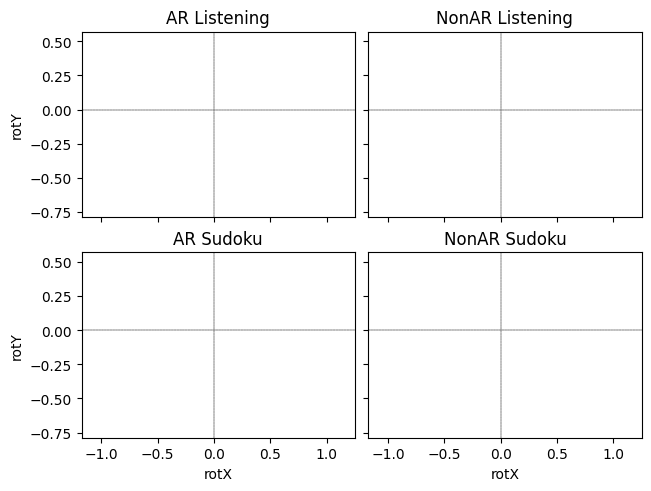

In [9]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

headtracking_files = glob.glob("data/headtracking/*.csv")
headtracking_dfs = (pd.read_csv(file) for file in headtracking_files)


fig, axs = plt.subplots(2, 2, layout="constrained")

for i in headtracking_dfs:
    alpha = 0.6
    size = 0.1
    marker = ","
    x_axis = "rotX"
    y_axis = "rotY"
    calibrationWindow = 5

    # Get the selected headtracking rows for each task permutation
    arlisten = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[   (i["ARorNonAR"]=="AR")    & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    for j, ax in enumerate(axs.flat):
        # ax.set_axisbelow(True)
        # ax.grid(linestyle="--", linewidth=0.1)
        ax.axhline(y=0, color='grey', linestyle='--', zorder=0, linewidth=0.1)
        ax.axvline(x=0, color='grey', linestyle='--', zorder=0, linewidth=0.1)
        ax.set_title(titles[j])
        # Normalise to center of screen
        datasets[j] -= datasets[j].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.scatter(datasets[j][x_axis], -datasets[j][y_axis], alpha=alpha, s=size, marker=marker)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel=x_axis, ylabel=y_axis)
    ax.label_outer()
    # use shared or custom below
    ax.sharex(axs[0,0])
    ax.sharey(axs[0,0])


# Custom axis sizes
# Xlim = (-1.5, 1.5)
# Ylim = (-0.4, 0.75)
# plt.setp(axs, xlim=Xlim, ylim=Ylim)

title="Evalutation of headtracking data, n=" + str(len(headtracking_files))
# fig.suptitle(title)
# plt.tight_layout()
# plt.savefig(figureSavePath+"headtracking", dpi=500)
plt.show()

# Hautleitfähigkeit

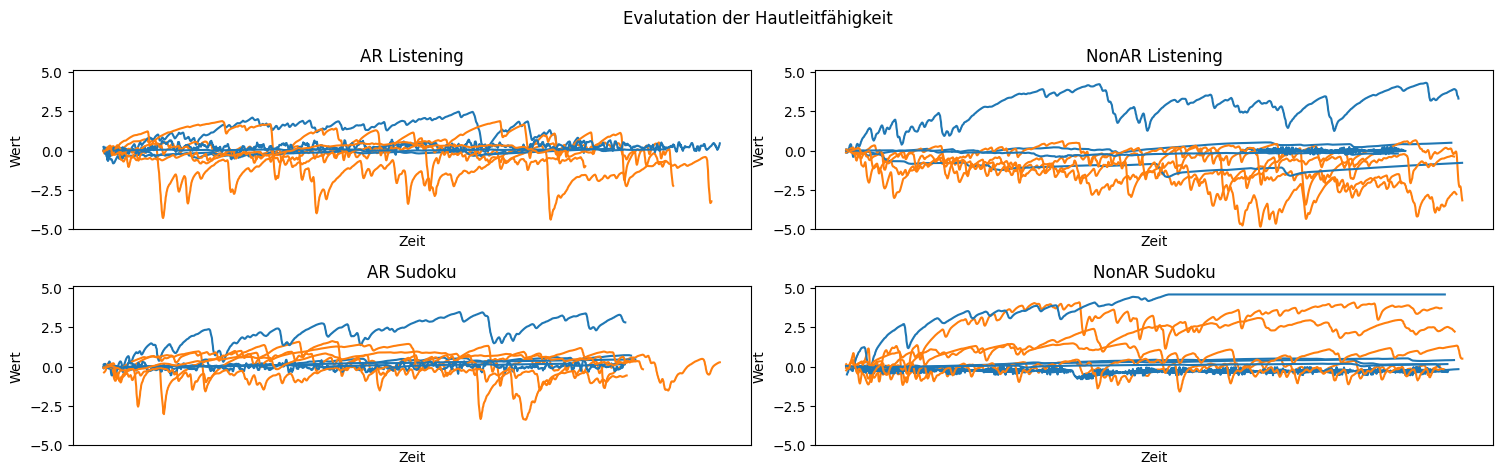

In [10]:
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd


path = "data/sweat/MA/*.json"
# path = "data/sweat/NoMA/*.json"


sweat_files = glob.glob(path)
temp_list = []
for file in sweat_files:
    with open(file, encoding='utf-8') as f:
        sweat_df = pd.json_normalize(json.loads(f.read()))
        temp_list.append(sweat_df)
sweat_dfs = (file for file in temp_list) # change to generator


fig, axs = plt.subplots(2, 2)
fig.set_figwidth(15)

for i in sweat_dfs:
    calibrationWindow = 20
    x_axis = "Time"
    y_axis = "Value"
    arlisten = i.loc[   (i["ArState"]=="AR")    & (i["Task"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ArState"]=="NonAR") & (i["Task"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[   (i["ArState"]=="AR")    & (i["Task"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ArState"]=="NonAR") & (i["Task"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    # Normalise to center of screen
    for j, ax in enumerate(axs.flat):
        datasets[j][x_axis] = pd.to_timedelta(datasets[j][x_axis])
        startMean = datasets[j][y_axis].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.plot(datasets[j][x_axis], datasets[j][y_axis]-startMean)
        ax.set_title(titles[j])
        


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='Zeit', ylabel='Wert')
    # ax.label_outer()
    # use shared or custom below
    # ax.sharex(axs[0,0])
    # ax.sharey(axs[0,0])
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            # top=False,         # ticks along the top edge are off
            labelbottom=False  # labels along the bottom edge are off
            )

# # Custom axis sizes
# # Xlim = (-1.5, 1.5)
Ylim = (-5, 5.1)
plt.setp(axs, 
        #  xlim=Xlim, 
         ylim=Ylim)

title="Evalutation der Hautleitfähigkeit"
fig.suptitle(title)
plt.tight_layout()
# plt.savefig(figureSavePath + "hautleitfähigkeit", dpi=500)
plt.show()
